## **First Look**

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# for coordinates
import geopandas as gpd
from shapely.geometry import Point

In [29]:
path = '/Users/Marcy_Student/Desktop/Marcy-Modules/Mod6/final-project/data/govt-collisions.csv'

df = pd.read_csv(path, parse_dates=['crash_date'])
df

,Unnamed: 0.1,Unnamed: 0,crash_date,crash_time,borough,zip_code,latitude,longitude,location,on_street_name,...,vehicle_type_code_4,vehicle_type_code_5,month,season,VEHICLES COMBINED,VEHICLE CLEAN,is_electric,total_injury_death,total_injury_death_flag,is_government
0,0,0,2022-01-01,7,NaN,NaN,40.771477,-73.918240,"(40.771477, -73.91824)",HOYT AVENUE NORTH,...,NaN,NaN,1,Winter,Sedan | | | |,Sedan,0,0,0,0
1,1,1,2022-01-01,4,NaN,NaN,NaN,NaN,NaN,Southern parkway,...,NaN,NaN,1,Winter,Sedan | Sedan | | |,Sedan,0,0,0,0
2,2,2,2022-01-01,7,NaN,NaN,NaN,NaN,NaN,WESTCHESTER AVENUE,...,NaN,NaN,1,Winter,Sedan | | | |,Sedan,0,0,0,0
3,3,3,2022-01-01,5,NaN,NaN,40.746930,-73.848660,"(40.74693, -73.84866)",GRAND CENTRAL PKWY,...,NaN,NaN,1,Winter,Sedan | Sedan | | |,Sedan,0,2,1,0
4,4,4,2022-01-01,1,NaN,NaN,40.819157,-73.960380,"(40.819157, -73.96038)",HENRY HUDSON PARKWAY,...,NaN,NaN,1,Winter,Sedan | Station Wagon/Sport Utility Vehicle | ...,Government Vehicle,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369996,369996,369996,2025-12-02,10,BRONX,10475.0,40.884712,-73.831300,"(40.884712, -73.8313)",DYRE AVE,...,NaN,NaN,12,Winter,Sedan | | | |,Sedan,0,2,1,0
369997,369997,369997,2025-12-02,19,BRONX,10451.0,40.814716,-73.922070,"(40.814716, -73.92207)",NaN,...,NaN,NaN,12,Winter,Sedan | Sedan | | |,Sedan,0,0,0,0
369998,369998,369998,2025-12-02,20,BROOKLYN,11219.0,40.639004,-74.000400,"(40.639004, -74.0004)",NaN,...,NaN,NaN,12,Winter,Sedan | | | |,Sedan,0,2,1,0
369999,369999,369999,2025-12-02,5,NaN,NaN,40.709960,-73.989334,"(40.70996, -73.989334)",FDR DRIVE,...,NaN,NaN,12,Winter,Sedan | | | |,Sedan,0,2,1,0


# Cleaning

In [30]:
# cleaning column names
df.columns = (
    df.columns
      .str.strip()
      .str.lower()
      .str.replace(" ", "_")
)
df.columns

Index(['unnamed:_0.1', 'unnamed:_0', 'crash_date', 'crash_time', 'borough',
       'zip_code', 'latitude', 'longitude', 'location', 'on_street_name',
       'cross_street_name', 'off_street_name', 'number_of_persons_injured',
       'number_of_persons_killed', 'number_of_pedestrians_injured',
       'number_of_pedestrians_killed', 'number_of_cyclist_injured',
       'number_of_cyclist_killed', 'number_of_motorist_injured',
       'number_of_motorist_killed', 'contributing_factor_vehicle_1',
       'contributing_factor_vehicle_2', 'contributing_factor_vehicle_3',
       'contributing_factor_vehicle_4', 'contributing_factor_vehicle_5',
       'collision_id', 'vehicle_type_code_1', 'vehicle_type_code_2',
       'vehicle_type_code_3', 'vehicle_type_code_4', 'vehicle_type_code_5',
       'month', 'season', 'vehicles_combined', 'vehicle_clean', 'is_electric',
       'total_injury_death', 'total_injury_death_flag', 'is_government'],
      dtype='object')

In [31]:
df['borough'].isna().sum()

np.int64(107666)

In [32]:
df['location'].isna().sum()

np.int64(24170)

In [33]:
print("------------------ Total NaNs per Column -------------------")
display(df.isna().sum())
print("------------------ Column Types -------------------")
display(df.dtypes)

------------------ Total NaNs per Column -------------------


unnamed:_0.1                          0
unnamed:_0                            0
crash_date                            0
crash_time                            0
borough                          107666
zip_code                         107718
latitude                          24170
longitude                         24170
location                          24170
on_street_name                   105048
cross_street_name                180849
off_street_name                  264957
number_of_persons_injured             0
number_of_persons_killed              0
number_of_pedestrians_injured         0
number_of_pedestrians_killed          0
number_of_cyclist_injured             0
number_of_cyclist_killed              0
number_of_motorist_injured            0
number_of_motorist_killed             0
contributing_factor_vehicle_1      2492
contributing_factor_vehicle_2     87627
contributing_factor_vehicle_3    336544
contributing_factor_vehicle_4    361202
contributing_factor_vehicle_5    367372


------------------ Column Types -------------------


unnamed:_0.1                              int64
unnamed:_0                                int64
crash_date                       datetime64[ns]
crash_time                                int64
borough                                  object
zip_code                                float64
latitude                                float64
longitude                               float64
location                                 object
on_street_name                           object
cross_street_name                        object
off_street_name                          object
number_of_persons_injured                 int64
number_of_persons_killed                  int64
number_of_pedestrians_injured             int64
number_of_pedestrians_killed              int64
number_of_cyclist_injured                 int64
number_of_cyclist_killed                  int64
number_of_motorist_injured                int64
number_of_motorist_killed                 int64
contributing_factor_vehicle_1           

# Feature Engineering

In [34]:
# filling in missing boroughs using the coordinate points
boroughs_gdf = gpd.read_file('/Users/Marcy_Student/Desktop/Marcy-Modules/Mod6/final-project/data/Borough_Boundaries_20251210.geojson')
boroughs_gdf

,:id,:version,:created_at,:updated_at,borocode,boroname,shape_area,shape_leng,geometry
0,row-mvnh~z8ju-gq5z,rv-nau4_7c46-8i7d,2025-11-24 21:41:25.965000+00:00,2025-11-24 21:41:25.965000+00:00,5,Staten Island,1623618358.46,325912.288988,"MULTIPOLYGON (((-74.05051 40.56642, -74.05047 ..."
1,row-v3ze.szzh.97hq,rv-sjpi_yxvf~3puy,2025-11-24 21:41:25.965000+00:00,2025-11-24 21:41:25.965000+00:00,2,Bronx,1187199300.26,463147.071763,"MULTIPOLYGON (((-73.89681 40.79581, -73.89694 ..."
2,row-w9tn~33qb~4p35,rv-sq95_wysi~5zpu,2025-11-24 21:41:25.965000+00:00,2025-11-24 21:41:25.965000+00:00,4,Queens,3041419179.08,887905.076135,"MULTIPOLYGON (((-73.82645 40.59053, -73.82642 ..."
3,row-sq5k-zuvm-aks7,rv-98bj-8pwh_ezpg,2025-11-24 21:41:25.965000+00:00,2025-11-24 21:41:25.965000+00:00,1,Manhattan,636631164.229,359536.412002,"MULTIPOLYGON (((-74.01093 40.68449, -74.01193 ..."
4,row-yjdh.qkh9-qhck,rv-zf3z~vbq5-v5ga,2025-11-24 21:41:25.965000+00:00,2025-11-24 21:41:25.965000+00:00,3,Brooklyn,1934462608.14,726953.045036,"MULTIPOLYGON (((-73.86327 40.58388, -73.86381 ..."


In [35]:
# creating shapely point
geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]

In [36]:
# implementing newly created shapely point into original df
collisions_gdf = gpd.GeoDataFrame(df, geometry=geometry, crs='EPSG:4326')
collisions_gdf.dtypes

unnamed:_0.1                              int64
unnamed:_0                                int64
crash_date                       datetime64[ns]
crash_time                                int64
borough                                  object
zip_code                                float64
latitude                                float64
longitude                               float64
location                                 object
on_street_name                           object
cross_street_name                        object
off_street_name                          object
number_of_persons_injured                 int64
number_of_persons_killed                  int64
number_of_pedestrians_injured             int64
number_of_pedestrians_killed              int64
number_of_cyclist_injured                 int64
number_of_cyclist_killed                  int64
number_of_motorist_injured                int64
number_of_motorist_killed                 int64
contributing_factor_vehicle_1           

In [37]:
col_boroughs = gpd.sjoin(
    collisions_gdf,
    boroughs_gdf[['boroname', 'geometry']], # Only keep the name and geometry columns
    how="left",
    predicate='within'
)

In [38]:
display(col_boroughs.isna().sum())
display(col_boroughs['boroname'].value_counts())

unnamed:_0.1                          0
unnamed:_0                            0
crash_date                            0
crash_time                            0
borough                          107666
zip_code                         107718
latitude                          24170
longitude                         24170
location                          24170
on_street_name                   105048
cross_street_name                180849
off_street_name                  264957
number_of_persons_injured             0
number_of_persons_killed              0
number_of_pedestrians_injured         0
number_of_pedestrians_killed          0
number_of_cyclist_injured             0
number_of_cyclist_killed              0
number_of_motorist_injured            0
number_of_motorist_killed             0
contributing_factor_vehicle_1      2492
contributing_factor_vehicle_2     87627
contributing_factor_vehicle_3    336544
contributing_factor_vehicle_4    361202
contributing_factor_vehicle_5    367372


boroname
Brooklyn         113562
Queens            95325
Manhattan         58805
Bronx             54343
Staten Island     18251
Name: count, dtype: int64

In [41]:
df

,unnamed:_0.1,unnamed:_0,crash_date,crash_time,borough,zip_code,latitude,longitude,location,on_street_name,...,vehicle_type_code_4,vehicle_type_code_5,month,season,vehicles_combined,vehicle_clean,is_electric,total_injury_death,total_injury_death_flag,is_government
0,0,0,2022-01-01,7,NaN,NaN,40.771477,-73.918240,"(40.771477, -73.91824)",HOYT AVENUE NORTH,...,NaN,NaN,1,Winter,Sedan | | | |,Sedan,0,0,0,0
1,1,1,2022-01-01,4,NaN,NaN,NaN,NaN,NaN,Southern parkway,...,NaN,NaN,1,Winter,Sedan | Sedan | | |,Sedan,0,0,0,0
2,2,2,2022-01-01,7,NaN,NaN,NaN,NaN,NaN,WESTCHESTER AVENUE,...,NaN,NaN,1,Winter,Sedan | | | |,Sedan,0,0,0,0
3,3,3,2022-01-01,5,NaN,NaN,40.746930,-73.848660,"(40.74693, -73.84866)",GRAND CENTRAL PKWY,...,NaN,NaN,1,Winter,Sedan | Sedan | | |,Sedan,0,2,1,0
4,4,4,2022-01-01,1,NaN,NaN,40.819157,-73.960380,"(40.819157, -73.96038)",HENRY HUDSON PARKWAY,...,NaN,NaN,1,Winter,Sedan | Station Wagon/Sport Utility Vehicle | ...,Government Vehicle,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369996,369996,369996,2025-12-02,10,BRONX,10475.0,40.884712,-73.831300,"(40.884712, -73.8313)",DYRE AVE,...,NaN,NaN,12,Winter,Sedan | | | |,Sedan,0,2,1,0
369997,369997,369997,2025-12-02,19,BRONX,10451.0,40.814716,-73.922070,"(40.814716, -73.92207)",NaN,...,NaN,NaN,12,Winter,Sedan | Sedan | | |,Sedan,0,0,0,0
369998,369998,369998,2025-12-02,20,BROOKLYN,11219.0,40.639004,-74.000400,"(40.639004, -74.0004)",NaN,...,NaN,NaN,12,Winter,Sedan | | | |,Sedan,0,2,1,0
369999,369999,369999,2025-12-02,5,NaN,NaN,40.709960,-73.989334,"(40.70996, -73.989334)",FDR DRIVE,...,NaN,NaN,12,Winter,Sedan | | | |,Sedan,0,2,1,0


In [40]:
col_boroughs

,unnamed:_0.1,unnamed:_0,crash_date,crash_time,borough,zip_code,latitude,longitude,location,on_street_name,...,season,vehicles_combined,vehicle_clean,is_electric,total_injury_death,total_injury_death_flag,is_government,geometry,index_right,boroname
0,0,0,2022-01-01,7,NaN,NaN,40.771477,-73.918240,"(40.771477, -73.91824)",HOYT AVENUE NORTH,...,Winter,Sedan | | | |,Sedan,0,0,0,0,POINT (-73.91824 40.77148),2.0,Queens
1,1,1,2022-01-01,4,NaN,NaN,NaN,NaN,NaN,Southern parkway,...,Winter,Sedan | Sedan | | |,Sedan,0,0,0,0,POINT EMPTY,NaN,NaN
2,2,2,2022-01-01,7,NaN,NaN,NaN,NaN,NaN,WESTCHESTER AVENUE,...,Winter,Sedan | | | |,Sedan,0,0,0,0,POINT EMPTY,NaN,NaN
3,3,3,2022-01-01,5,NaN,NaN,40.746930,-73.848660,"(40.74693, -73.84866)",GRAND CENTRAL PKWY,...,Winter,Sedan | Sedan | | |,Sedan,0,2,1,0,POINT (-73.84866 40.74693),2.0,Queens
4,4,4,2022-01-01,1,NaN,NaN,40.819157,-73.960380,"(40.819157, -73.96038)",HENRY HUDSON PARKWAY,...,Winter,Sedan | Station Wagon/Sport Utility Vehicle | ...,Government Vehicle,0,0,0,1,POINT (-73.96038 40.81916),3.0,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369996,369996,369996,2025-12-02,10,BRONX,10475.0,40.884712,-73.831300,"(40.884712, -73.8313)",DYRE AVE,...,Winter,Sedan | | | |,Sedan,0,2,1,0,POINT (-73.8313 40.88471),1.0,Bronx
369997,369997,369997,2025-12-02,19,BRONX,10451.0,40.814716,-73.922070,"(40.814716, -73.92207)",NaN,...,Winter,Sedan | Sedan | | |,Sedan,0,0,0,0,POINT (-73.92207 40.81472),1.0,Bronx
369998,369998,369998,2025-12-02,20,BROOKLYN,11219.0,40.639004,-74.000400,"(40.639004, -74.0004)",NaN,...,Winter,Sedan | | | |,Sedan,0,2,1,0,POINT (-74.0004 40.639),4.0,Brooklyn
369999,369999,369999,2025-12-02,5,NaN,NaN,40.709960,-73.989334,"(40.70996, -73.989334)",FDR DRIVE,...,Winter,Sedan | | | |,Sedan,0,2,1,0,POINT (-73.98933 40.70996),3.0,Manhattan


In [42]:
df = pd.merge(df, col_boroughs[['unnamed:_0', 'boroname']], on='unnamed:_0', how='left')

In [44]:
df.dtypes

unnamed:_0.1                              int64
unnamed:_0                                int64
crash_date                       datetime64[ns]
crash_time                                int64
borough                                  object
zip_code                                float64
latitude                                float64
longitude                               float64
location                                 object
on_street_name                           object
cross_street_name                        object
off_street_name                          object
number_of_persons_injured                 int64
number_of_persons_killed                  int64
number_of_pedestrians_injured             int64
number_of_pedestrians_killed              int64
number_of_cyclist_injured                 int64
number_of_cyclist_killed                  int64
number_of_motorist_injured                int64
number_of_motorist_killed                 int64
contributing_factor_vehicle_1           

In [45]:
# new column: month
df['month'] = df['crash_date'].dt.month
df['month'].value_counts()

month
5     34287
6     33118
10    32979
9     32553
7     32029
3     31930
8     31563
4     30401
11    30328
1     29361
2     27091
12    24361
Name: count, dtype: int64

In [46]:
# new column: season

season = []

for x in df['month']:
    if x in [12,1,2]:
        season.append('Winter')
    elif x in [3,4,5]:
        season.append('Spring')
    elif x in [6,7,8]:
        season.append('Summer')
    elif x in [9,10,11]:
        season.append('Fall')
    else:
        season.append('Error')

df['season'] = season
df['season'].value_counts()

season
Summer    96710
Spring    96618
Fall      95860
Winter    80813
Name: count, dtype: int64

In [47]:
injury_death = ['number_of_persons_injured',
       'number_of_persons_killed', 'number_of_pedestrians_injured',
       'number_of_pedestrians_killed', 'number_of_cyclist_injured',
       'number_of_cyclist_killed', 'number_of_motorist_injured',
       'number_of_motorist_killed']


df['total_injury_death'] = df[injury_death].sum(axis=1)

inj_death_flag = []
for y in df['total_injury_death']:
        if y > 0:
            inj_death_flag.append(1)
        elif y == 0:
            inj_death_flag.append(0)
        else:
            inj_death_flag.append(0)

df['total_injury_death_flag'] = inj_death_flag
df['total_injury_death_flag'].value_counts()

total_injury_death_flag
0    215619
1    154382
Name: count, dtype: int64

# EDA

In [48]:
# total number of people injured from motor vehicle collisions
print(df['number_of_persons_injured'].sum())
display(df['number_of_persons_injured'].value_counts())

205869


number_of_persons_injured
0     216375
1     120031
2      22283
3       7219
4       2501
5        901
6        370
7        140
8         71
9         28
10        25
11        15
13        11
15        10
12         7
14         3
17         3
20         2
40         1
21         1
23         1
34         1
18         1
25         1
Name: count, dtype: int64

/var/folders/gs/yv3dj4zx2tgdd5tw701ypspm0000gp/T/ipykernel_7275/3240691189.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(df, x='season', y='number_of_persons_injured', palette='pastel', estimator='sum')


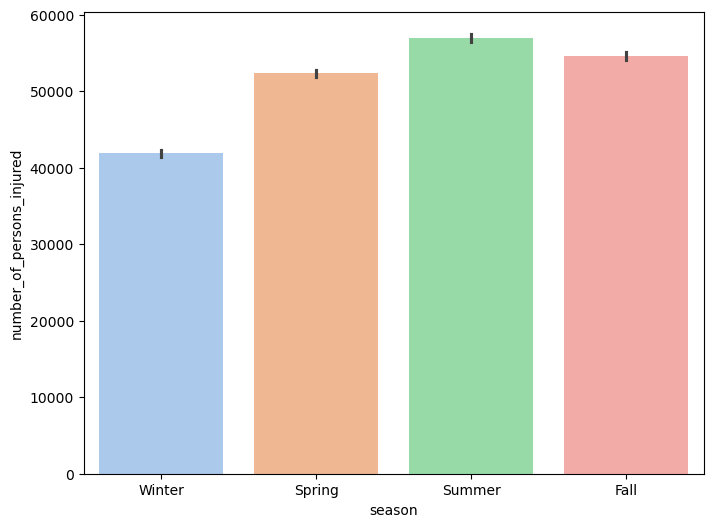

In [49]:
plt.figure(figsize=[8,6])
ax = sns.barplot(df, x='season', y='number_of_persons_injured', palette='pastel', estimator='sum')

In [50]:
df

,unnamed:_0.1,unnamed:_0,crash_date,crash_time,borough,zip_code,latitude,longitude,location,on_street_name,...,vehicle_type_code_5,month,season,vehicles_combined,vehicle_clean,is_electric,total_injury_death,total_injury_death_flag,is_government,boroname
0,0,0,2022-01-01,7,NaN,NaN,40.771477,-73.918240,"(40.771477, -73.91824)",HOYT AVENUE NORTH,...,NaN,1,Winter,Sedan | | | |,Sedan,0,0,0,0,Queens
1,1,1,2022-01-01,4,NaN,NaN,NaN,NaN,NaN,Southern parkway,...,NaN,1,Winter,Sedan | Sedan | | |,Sedan,0,0,0,0,NaN
2,2,2,2022-01-01,7,NaN,NaN,NaN,NaN,NaN,WESTCHESTER AVENUE,...,NaN,1,Winter,Sedan | | | |,Sedan,0,0,0,0,NaN
3,3,3,2022-01-01,5,NaN,NaN,40.746930,-73.848660,"(40.74693, -73.84866)",GRAND CENTRAL PKWY,...,NaN,1,Winter,Sedan | Sedan | | |,Sedan,0,2,1,0,Queens
4,4,4,2022-01-01,1,NaN,NaN,40.819157,-73.960380,"(40.819157, -73.96038)",HENRY HUDSON PARKWAY,...,NaN,1,Winter,Sedan | Station Wagon/Sport Utility Vehicle | ...,Government Vehicle,0,0,0,1,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369996,369996,369996,2025-12-02,10,BRONX,10475.0,40.884712,-73.831300,"(40.884712, -73.8313)",DYRE AVE,...,NaN,12,Winter,Sedan | | | |,Sedan,0,2,1,0,Bronx
369997,369997,369997,2025-12-02,19,BRONX,10451.0,40.814716,-73.922070,"(40.814716, -73.92207)",NaN,...,NaN,12,Winter,Sedan | Sedan | | |,Sedan,0,0,0,0,Bronx
369998,369998,369998,2025-12-02,20,BROOKLYN,11219.0,40.639004,-74.000400,"(40.639004, -74.0004)",NaN,...,NaN,12,Winter,Sedan | | | |,Sedan,0,2,1,0,Brooklyn
369999,369999,369999,2025-12-02,5,NaN,NaN,40.709960,-73.989334,"(40.70996, -73.989334)",FDR DRIVE,...,NaN,12,Winter,Sedan | | | |,Sedan,0,2,1,0,Manhattan


In [55]:
df.to_csv('/Users/Marcy_Student/Desktop/Marcy-Modules/Mod6/final-project/data/clean_full_collisions.csv')

In [54]:
df

,unnamed:_0.1,unnamed:_0,crash_date,crash_time,borough,zip_code,latitude,longitude,location,on_street_name,...,vehicle_type_code_5,month,season,vehicles_combined,vehicle_clean,is_electric,total_injury_death,total_injury_death_flag,is_government,boroname
0,0,0,2022-01-01,7,NaN,NaN,40.771477,-73.918240,"(40.771477, -73.91824)",HOYT AVENUE NORTH,...,NaN,1,Winter,Sedan | | | |,Sedan,0,0,0,0,Queens
1,1,1,2022-01-01,4,NaN,NaN,NaN,NaN,NaN,Southern parkway,...,NaN,1,Winter,Sedan | Sedan | | |,Sedan,0,0,0,0,NaN
2,2,2,2022-01-01,7,NaN,NaN,NaN,NaN,NaN,WESTCHESTER AVENUE,...,NaN,1,Winter,Sedan | | | |,Sedan,0,0,0,0,NaN
3,3,3,2022-01-01,5,NaN,NaN,40.746930,-73.848660,"(40.74693, -73.84866)",GRAND CENTRAL PKWY,...,NaN,1,Winter,Sedan | Sedan | | |,Sedan,0,2,1,0,Queens
4,4,4,2022-01-01,1,NaN,NaN,40.819157,-73.960380,"(40.819157, -73.96038)",HENRY HUDSON PARKWAY,...,NaN,1,Winter,Sedan | Station Wagon/Sport Utility Vehicle | ...,Government Vehicle,0,0,0,1,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369996,369996,369996,2025-12-02,10,BRONX,10475.0,40.884712,-73.831300,"(40.884712, -73.8313)",DYRE AVE,...,NaN,12,Winter,Sedan | | | |,Sedan,0,2,1,0,Bronx
369997,369997,369997,2025-12-02,19,BRONX,10451.0,40.814716,-73.922070,"(40.814716, -73.92207)",NaN,...,NaN,12,Winter,Sedan | Sedan | | |,Sedan,0,0,0,0,Bronx
369998,369998,369998,2025-12-02,20,BROOKLYN,11219.0,40.639004,-74.000400,"(40.639004, -74.0004)",NaN,...,NaN,12,Winter,Sedan | | | |,Sedan,0,2,1,0,Brooklyn
369999,369999,369999,2025-12-02,5,NaN,NaN,40.709960,-73.989334,"(40.70996, -73.989334)",FDR DRIVE,...,NaN,12,Winter,Sedan | | | |,Sedan,0,2,1,0,Manhattan


In [53]:
df['crash_time'].value_counts()

crash_time
17    23044
16    22884
15    21956
14    21041
18    20678
8     19637
19    18359
13    18289
12    18107
9     17011
11    16805
0     16692
10    16288
20    16056
21    14832
7     13869
22    13684
23    12401
6     10275
1      8850
5      7664
4      7609
2      7216
3      6754
Name: count, dtype: int64